In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./data/UAV/log0001/px4/09_00_22_vehicle_visual_odometry_0.csv")
df

,timestamp,timestamp_sample,position[0],position[1],position[2],q[0],q[1],q[2],q[3],velocity[0],...,orientation_variance[0],orientation_variance[1],orientation_variance[2],velocity_variance[0],velocity_variance[1],velocity_variance[2],pose_frame,velocity_frame,reset_counter,quality
0,603027009,602910573,-0.000106,0.000461,-0.100026,0.999325,-0.023998,-0.027802,-0.000128,0.000322,...,1.162144e-08,8.228880e-09,2.180040e-08,0.000004,0.000004,0.000004,2,3,2,100
1,603067098,603038760,-0.000116,0.000453,-0.100027,0.999324,-0.024017,-0.027834,-0.000221,-0.000806,...,1.167150e-08,8.163763e-09,2.208001e-08,0.000005,0.000004,0.000004,2,3,2,100
2,603107345,603078254,-0.000155,0.000393,-0.100027,0.999330,-0.023961,-0.027680,-0.000270,-0.001509,...,1.124311e-08,8.119949e-09,2.158616e-08,0.000004,0.000004,0.000004,2,3,2,100
3,603141875,603113685,-0.000124,0.000418,-0.100017,0.999324,-0.024001,-0.027852,-0.000238,-0.000233,...,1.086517e-08,8.049543e-09,2.139241e-08,0.000004,0.000004,0.000004,2,3,2,100
4,603166029,603143261,-0.000131,0.000417,-0.100033,0.999329,-0.023993,-0.027669,-0.000190,-0.001161,...,1.100127e-08,7.959213e-09,2.118177e-08,0.000005,0.000004,0.000004,2,3,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,657763799,657759298,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,-1
1643,657799363,657791346,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,-1
1644,657829940,657824369,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,-1
1645,657862963,657858264,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,-1


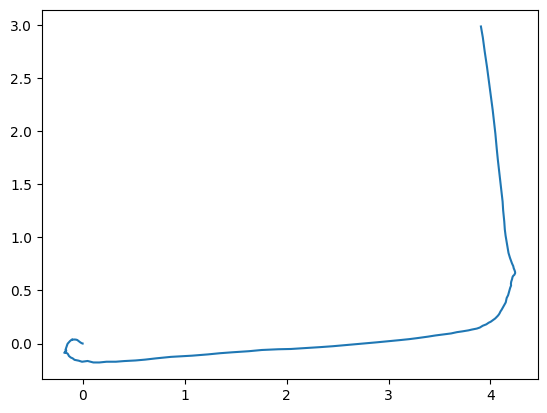

In [17]:
plt.plot(
  df['position[0]'].values[:260],
  df['position[1]'].values[:260]
)

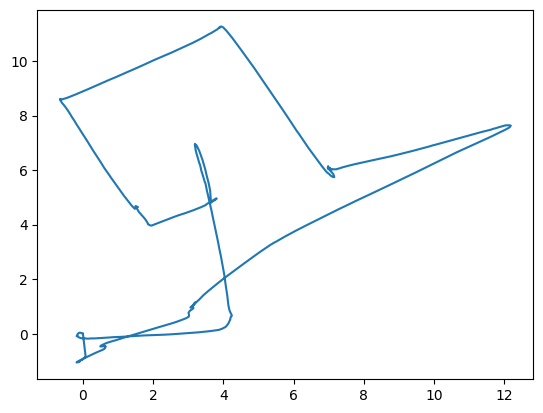

In [11]:
plt.plot(
  df['position[0]'],
  df['position[1]']
)

In [41]:
roll = df['angular_velocity[0]'].cumsum() * np.pi / 180
pitch = df['angular_velocity[1]'].cumsum() * np.pi / 180
yaw = df['angular_velocity[2]'].cumsum() * np.pi / 180
dt = df['timestamp'].diff() / 1e6
dt[0] = 0.
ts = dt.cumsum()
index = np.arange(roll.shape[0])

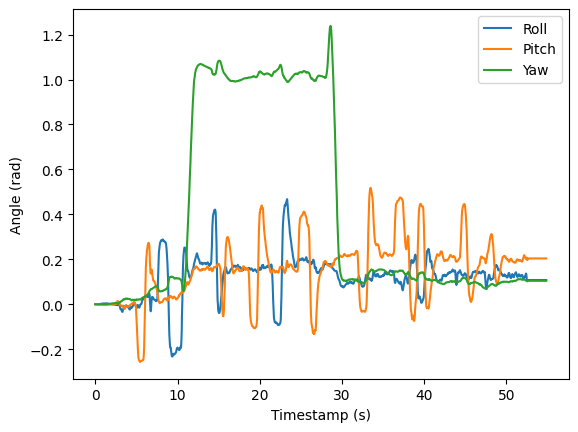

In [42]:
plt.plot(ts, roll, label="Roll")
plt.plot(ts, pitch, label="Pitch")
plt.plot(ts, yaw, label="Yaw")
plt.xlabel("Timestamp (s)")
plt.ylabel("Angle (rad)")
plt.legend()

In [28]:
df[['angular_velocity[0]', 'angular_velocity[1]', 'angular_velocity[2]']].describe()

,angular_velocity[0],angular_velocity[1],angular_velocity[2]
count,1647.000000,1647.000000,1647.000000
mean,0.003751,0.007090,0.003631
std,0.542133,0.715553,0.380256
min,-4.222807,-3.962454,-2.556366
25%,-0.125848,-0.117000,-0.037927
50%,0.000000,0.000000,0.000000
75%,0.127712,0.138574,0.043478
max,4.156742,4.087571,1.851869


0        0.000000
1        0.040089
2        0.080336
3        0.114866
4        0.139020
          ...    
1642    54.736790
1643    54.772354
1644    54.802931
1645    54.835954
1646    54.864405
Name: timestamp, Length: 1647, dtype: float64